# *Machine Learning*


Lecturers: Golnaz Sahebi

**Chapter 1 – The Machine Learning landscape**



<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

For example, suppose  you want to know if money makes people happy, so you download the Better Life Index data from the OECD’s website  and stats about gross domestic product (GDP) per capita from the IMF’s website .

<div>
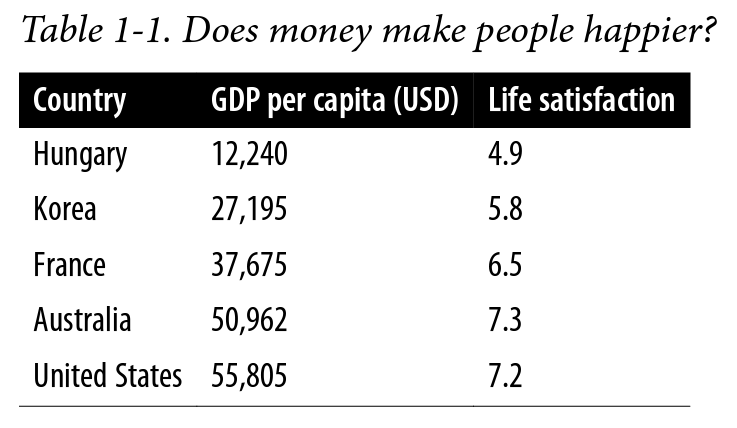
</div>

Let’s plot the data for these countries

<div>
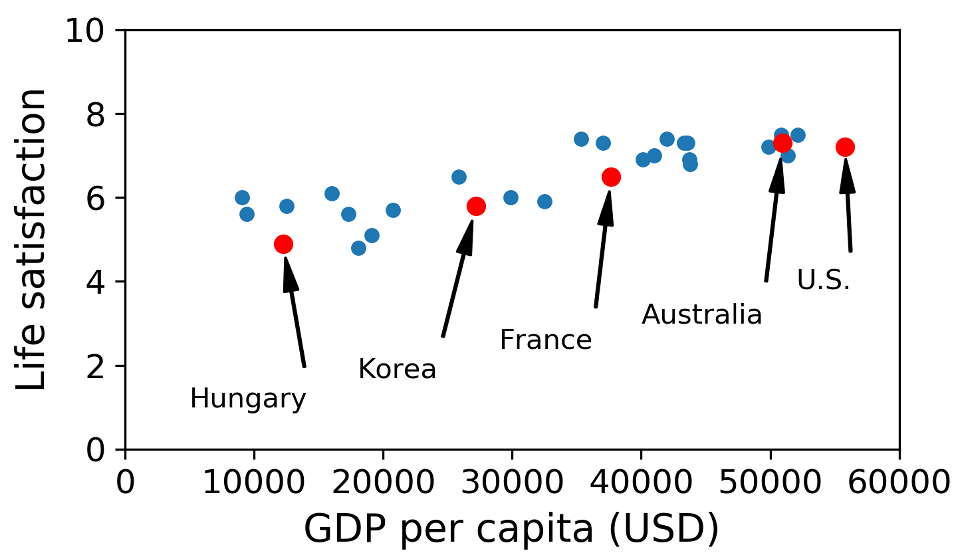
</div>

Although  the data is noisy  (i.e., partly random), it looks like life satisfaction goes up more or less linearly as the country’s GDP per capita increases. So you decide to model life satisfaction as a linear function of GDP per capita. 

Model selection : you selected a linear model  of life satisfaction with just one attribute, GDP per capita

A simple linear model
<div>
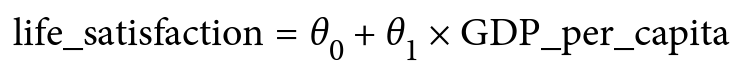
</div>

This  model has two model parameters , θ<sub>0</sub>  and θ<sub>1</sub> . By tweaking these parameters, you can make your model represent any linear function

<div>
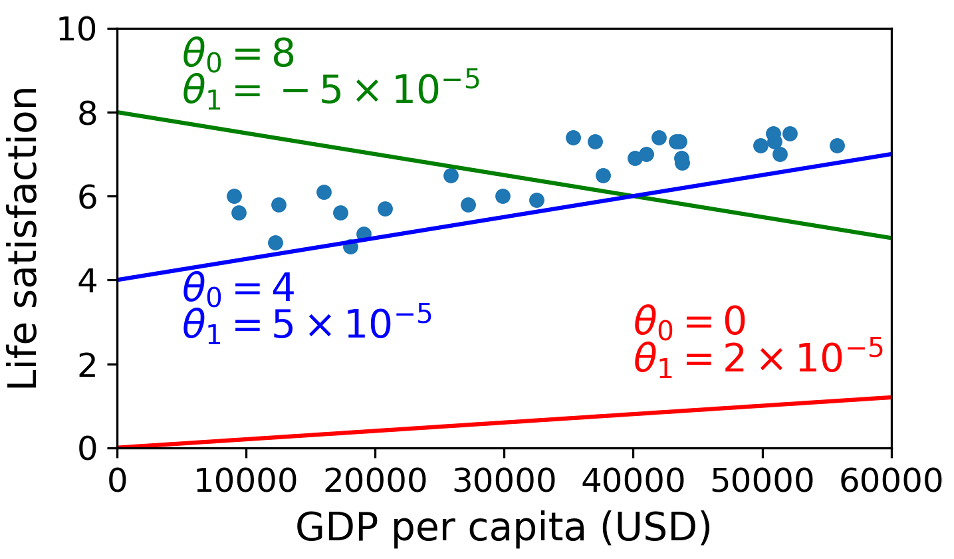
</div>


This is where the Linear Regression algorithm comes in: you feed it your training examples, and it finds the parameters that make the linear model fit best to your data. This  is called training  the model. In our case, the algorithm finds that the optimal parameter values are:

<div>
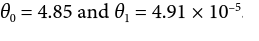
</div>


Training a model means running an algorithm to find the model parameters that will make it best fit the training data

!<div>
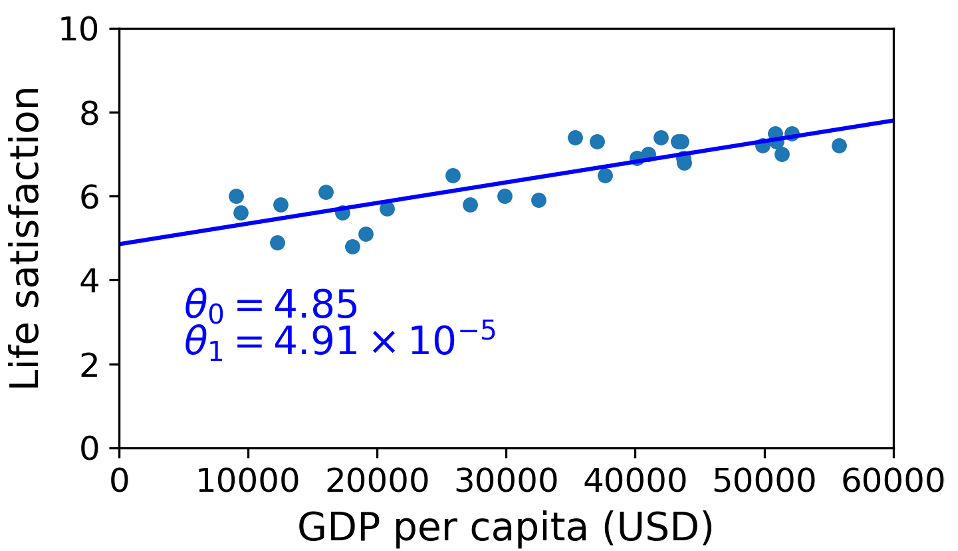
</div>

You are finally ready to run the model to make predictions. For example, say you want to know how happy Cypriots are, and the OECD data does not have the answer. Fortunately, you can use your model to make a good prediction: you look up Cyprus’s GDP per capita, find $22,587, and then apply your model and find that life satisfaction is likely to be somewhere around

<div>
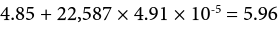
</div>

# Code example 1-1

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why it has been left out of the book.

In [4]:
# It filters, pivots, and merges these datasets to create a new dataset that contains 
#the GDP per capita and life satisfaction values for different countries, while removing unwanted data points.
def prepare_country_stats(oecd_bli, gdp_per_capita):
     # Filter the OECD Better Life Index (oecd_bli) dataset to include only rows where "INEQUALITY" is "TOT". "TOT" (total, meaning data for the entire population, regardless of income, gender, etc.
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    # Pivot the dataset to make "Country" the index and "Indicator" columns, with the values being from the "Value" column
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # Rename the "2015" column in the GDP per capita dataset to "GDP per capita" for clarity
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # Set "Country" as the index for the GDP per capita dataset
    gdp_per_capita.set_index("Country", inplace=True)
    # Merge the OECD Better Life Index dataset with the GDP per capita dataset using the "Country" index
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    # Sort the merged dataset by "GDP per capita" in ascending order
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    # Define indices to remove from the dataset (these might be outliers or irrelevant data points)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    # Create a list of indices to keep by excluding the remove_indices from the full range of data points
    keep_indices = list(set(range(36)) - set(remove_indices))
    # Return the cleaned dataset with only "GDP per capita" and "Life satisfaction" columns, keeping specific indices
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


The code in the book expects the data files to be located in the current directory. We just tweaked it here to fetch the files in `datasets/lifesat`.

In [5]:
# the path of where our data will be stored
import os
datapath = os.path.join("datasets", "lifesat", "")


In [6]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [7]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

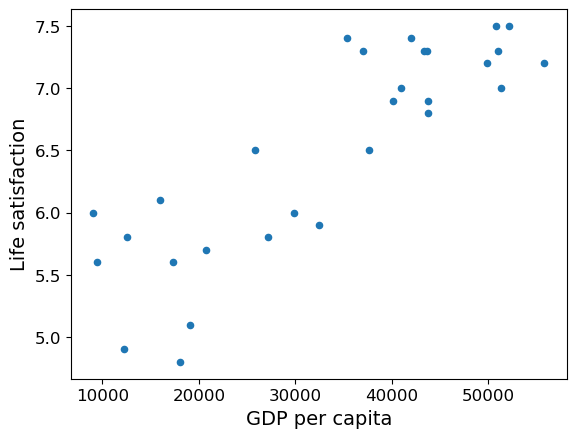

[[7.12696239]]


In [14]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
#Create the featureset and the lables
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

#np.c_[]: This is a special function in NumPy that concatenates arrays along the second axis 
#(i.e., column-wise). In this case, it transforms a pandas Series (which is one-dimensional) 
#into a 2D NumPy array (as machine learning models typically expect data in matrix form).

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[46297.24]]  # Cyprus' GDP per capita
print(model.predict(X_new)) 

Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
lines:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

with these two:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [9]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3) 

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new))


[[7.]]


## The End!